# [小白向-上课笔记] 简单看下怎么读取:

CSV/XLS    (pandas)

2D自然图像  (Pillow/PIL)

NIFTI      (nibabel)

DICOM      (pydicom)

# 1. CSV/XLS    (pandas)https://pandas.pydata.org/docs/user_guide/index.html

In [1]:
!pip install pandas
!pip install xlrd

import pandas

In [2]:
example_CSV = pandas.read_csv('Example.csv')
print(example_CSV)

    PatientID  Age  Weight (lbs)  Height (cm)
0        1001   59           200          165
1        1002   64           120          156
2        1003   52           165          185
3        1004   32           160          177
4        1005   98           132          165
5        1006   50           200          177
6        1007   35           130          134
7        1008   76           110          153
8        1009   85           154          167
9        1010   36           162          156
10       1012   85           112          184
11       1013   41           103          190
12       1014   64           160          175
13       1015   56           201          162
14       1016   51           187          167
15       1017   55           165          161
16       1018   38           123          158
17       1019   65           154          163
18       1020   45           165          175


In [3]:
example_XLS = pandas.read_excel('Example.xls')
print(example_XLS)

    PatientID  Age  Weight (lbs)  Height (cm)
0        1001   59           200          165
1        1002   64           120          156
2        1003   52           165          185
3        1004   32           160          177
4        1005   98           132          165
5        1006   50           200          177
6        1007   35           130          134
7        1008   76           110          153
8        1009   85           154          167
9        1010   36           162          156
10       1012   85           112          184
11       1013   41           103          190
12       1014   64           160          175
13       1015   56           201          162
14       1016   51           187          167
15       1017   55           165          161
16       1018   38           123          158
17       1019   65           154          163
18       1020   45           165          175


In [4]:
#提取'Age'列 (提取含有'Age'的一列)
ages = example_CSV['Age'].values
print(ages)

[59 64 52 32 98 50 35 76 85 36 85 41 64 56 51 55 38 65 45]


In [5]:
# 查看所有列的名字（查看表头）
column_names = example_CSV.columns
print(column_names)

Index(['PatientID', 'Age', 'Weight (lbs)', 'Height (cm)'], dtype='object')


In [6]:
#查看1002号患者信息(不是仅仅提取含有'1002'的一行)
pat_1002 = example_CSV.loc[example_CSV['PatientID'] == 1002].values
print(pat_1002)

[[1002   64  120  156]]


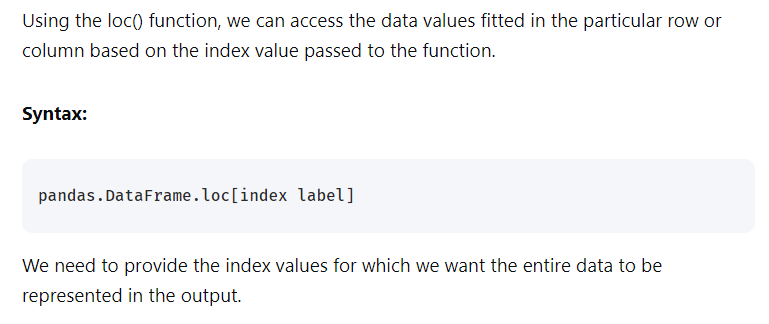

In [7]:
# 同理查看身高167的患者(们)的信息
height_167 = example_CSV.loc[example_CSV['Height (cm)'] == 167].values
print(height_167)

[[1009   85  154  167]
 [1016   51  187  167]]


# 2. 2D自然图像  (pillow/PIL)     https://pillow.readthedocs.io/en/stable/

In [8]:
# Warning: Pillow and PIL cannot co-exist in the same environment. Before installing Pillow, please uninstall PIL.
!pip install Pillow 

import PIL
from PIL import Image # Warning:Pillow >= 1.0 no longer supports import Image. Please use from PIL import Image instead.
import matplotlib.pyplot
import numpy

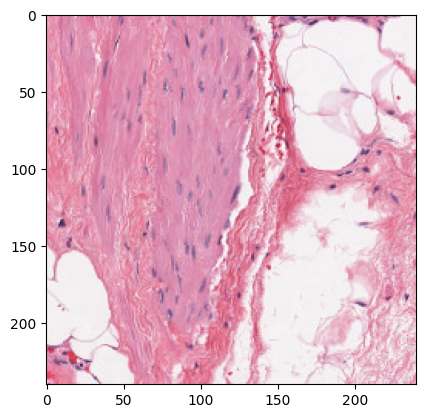

In [9]:
# 加载一个 .tif 图片
img = Image.open('TestTif.tif')
matplotlib.pyplot.imshow(img) #可视化图像

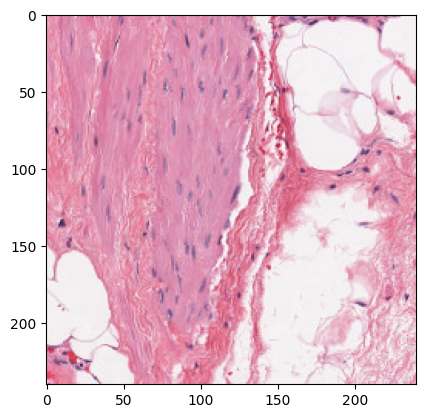

In [10]:
# .tif 转换成 numpy图像 （numpy array）
img_array = numpy.array(img)
matplotlib.pyplot.imshow(img_array)

In [11]:
print(type(img))       #查看数组数据类型：type(A)
print(type(img_array))
print(img_array.dtype)#查看数组中元素的数据类型: A.dtype

<class 'PIL.TiffImagePlugin.TiffImageFile'>
<class 'numpy.ndarray'>
uint8


In [12]:
img_array_dtype32 = img_array.astype('float32')
print(type(img_array_dtype32))
print(img_array_dtype32.dtype)

<class 'numpy.ndarray'>
float32


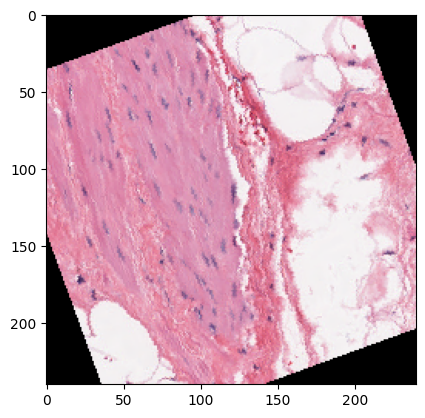

In [13]:
# 将图像逆时针旋转20°.
img_array_rot20 = numpy.array(img.rotate(20)) #eg.https://numpy.org/doc/stable/reference/generated/numpy.rot90.html
matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(img_array_rot20)

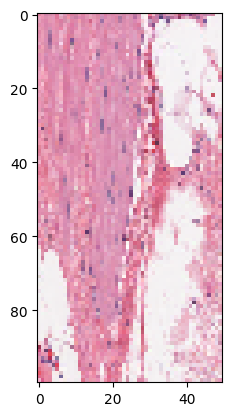

In [14]:
# 重采样 Resize the image using nearest neighbour resampling.
# See https://en.wikipedia.org/wiki/Comparison_gallery_of_image_scaling_algorithms 
# for a visual comparison of different resampling approaches.
img_array_resize = numpy.array(img.resize((50,100), resample=PIL.Image.NEAREST)) # 相当于给竖着拉长了
matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(img_array_resize)

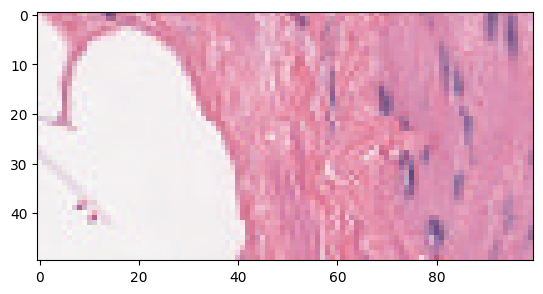

In [15]:
# Crop the image.
img_array_crop = numpy.array(img.crop((0, 150, 100, 200))) # im.crop((left, top, right, bottom)) 四条线围成的区域
matplotlib.pyplot.figure()
matplotlib.pyplot.imshow(img_array_crop)

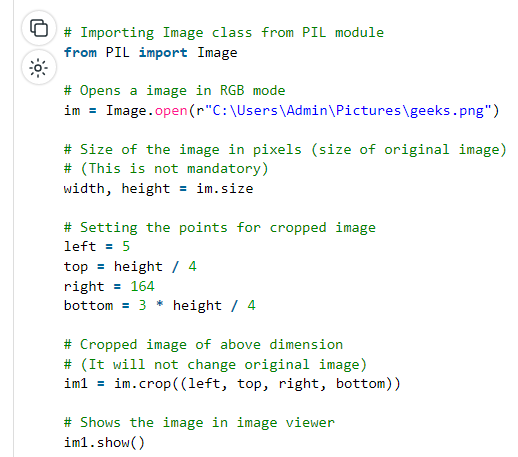

# 3. NIFTI      (nibabel) https://nipy.org/nibabel/gettingstarted.html

In [16]:
!pip install nibabel
import nibabel

In [17]:
#加载一个 NIFTI 图像
img = nibabel.load('TestNifti.nii.gz')
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [18]:
#不要用 imshow() 可视化 NIFTI
img.dtype # AttributeError: 'Nifti1Image' object has no attribute 'dtype'
matplotlib.pyplot.imshow(img) # TypeError: Image data of dtype object cannot be converted to float

AttributeError: 'Nifti1Image' object has no attribute 'dtype'

In [19]:
# 所以要用 numpy 转换成好处理的 np img
# Extract the numpy array from the img object.
img_array = img.get_fdata()

In [20]:
# Display its shape. 看看数据形状/维度 （三维数据192*256*192，最后一个记录channel数量？？，比如灰度=1，rgb=3）
print(img_array.shape)

(192, 256, 192, 1)


In [21]:
img_squz=numpy.squeeze(img_array) #把维度为1的向量去掉
img_squz.shape

(192, 256, 192)

In [22]:
import nibabel
import numpy
img = nibabel.load('TestNifti.nii.gz')
img_affine = img.affine
nibabel.aff2axcodes(img_affine)

('L', 'P', 'S')

L:(from right) to left 从右到左

P:(from anterior) to posterior  (from front to back) 从前到后

S:(from interior) to superior  (from bottom to up)  从下到上

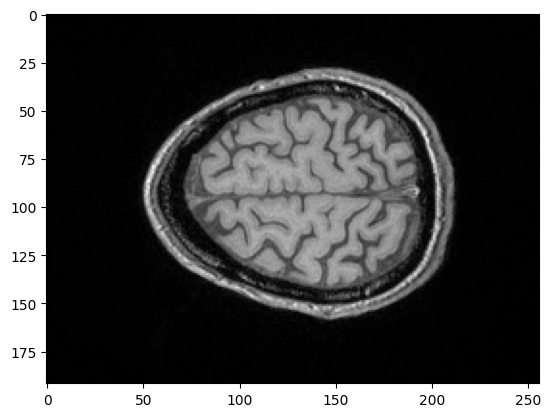

In [29]:
import matplotlib.pyplot

# Display a slice of the image. 看看其中的一张切片（index=0, "高度"=160）
matplotlib.pyplot.imshow(img_array[:, :, 150, 0], cmap="gray")

In [30]:
# Display the NIFTI header.
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 192 256 192   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    1.    1.    1.    0.019 0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 360.0
cal_min         : 162.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b' HEAD^BRAIN T1 AX 19MB 1010 BRAIN^MR 2008-08-01'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 96.0
qoffset_y       : 

# 4. DICOM      (pydicom) https://pydicom.github.io/pydicom/stable/index.html

In [31]:
!pip install pydicom
import pydicom

In [32]:
# Load DICOM image.加载DICOM图像
img = pydicom.dcmread('TestDicom.DCM')

In [33]:
# Extract the numpy array from the img object.
img_array = img.pixel_array

In [34]:
# Display its shape.
print(img_array.shape)

(70, 512, 512)


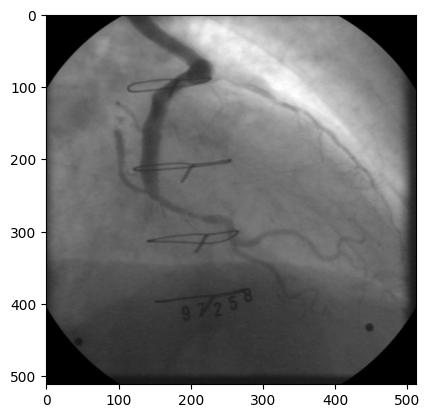

In [35]:
# Display a slice of the image.
matplotlib.pyplot.imshow(img_array[0,:,:], cmap='gray')

In [36]:
# Display the DICOM header.
display(img)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: X-Ray Angiographic Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.4.3.11540117440512.19970422.140030.20
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.3.12.2.1107.5.4.3.2
(0002, 0016) Source Application Entity Title     AE: 'SIEMENS:DCR 1.50'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'SINGLE PLANE', 'SINGLE A']
(0008, 0016) SOP Class UID                       UI: X-Ray Angiographic Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.4.3.11540117440512.19970422.140030

## DICOM和NIFTI之间的差异

DICOM和NIfTI之间的主要区别在于NIfTI中的原始图像数据被保存为3d图像，在DICOM中有2d图像切片。 

这使得NIFTI比DICOM的某些机器学习应用更受欢迎，因为它被建模为3d图像。 

处理单个NIFTI文件比起处理数百个DICOM更容易实现。 

Nifti每个3d图像存储2个文件，而DICOM则存储数十个文件。

原文链接：https://zhuanlan.zhihu.com/p/68538289